# Libraries and data

In [5]:
#Libraries
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [6]:
#Load Data
df = pd.read_csv("Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Normal Distribution

<Axes: ylabel='Density'>

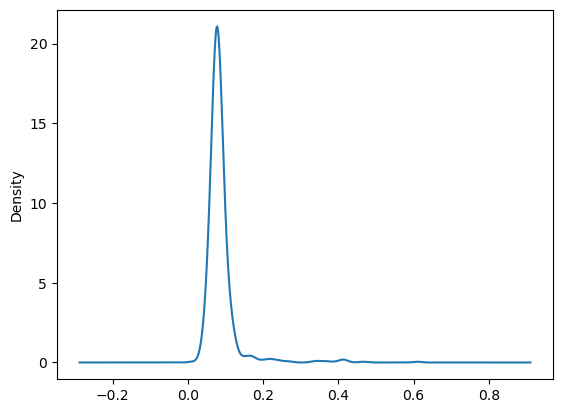

In [7]:
#Density plot of Chlorides
df.chlorides.plot.density()


In [8]:
# Check the # of observations within X standard deviations
df.loc[(df.chlorides <= df.chlorides.mean() + 3 * df.chlorides.std()) & 
       (df.chlorides >= df.chlorides.mean() - 3 * df.chlorides.std())].chlorides.count()/df.chlorides.count()

0.9806128830519074

<Axes: ylabel='Density'>

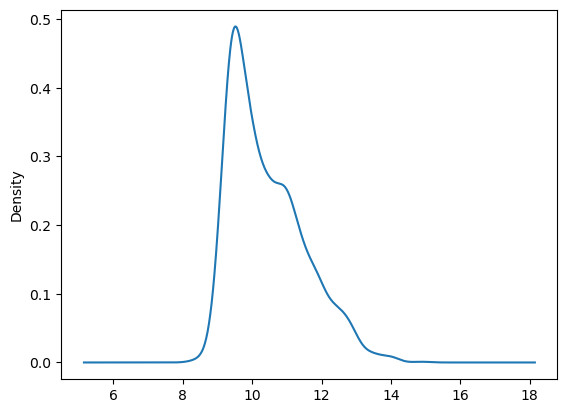

In [9]:
df.alcohol.plot.density()

In [10]:
#find what is the shares of observations within 3 standard deviations of alcohol
df.loc[(df.alcohol <= df.alcohol.mean() + 3 * df.alcohol.std()) & 
       (df.alcohol >= df.alcohol.mean() - 3 * df.alcohol.std())].alcohol.count()/df.alcohol.count()

0.9949968730456535

# Shapiro-Wilks Teste

In [11]:
#Shapiro-Wilks for normality
stat, p = st.shapiro(df.chlorides)
print(p)
#condition
if p > 0.05:
    #if yes
    print('Sample looks Gaussian/Normal (fail to reject H0)')
    #if not
else:
     print('Sample does not looks Gaussian/Normal (reject H0)')   

0.0
Sample does not looks Gaussian/Normal (reject H0)


In [12]:
#Shapiro-Wilks Test for Sulphates and create if else condition
stat, p = st.shapiro(df.sulphates)
print(p)
if p > 0.05:
    print('Sample looks Gaussian/Normal (fail to reject H0)')
else:
    print('Sample does not looks Gaussian/Normal (reject H0)')

5.822191090213209e-38
Sample does not looks Gaussian/Normal (reject H0)


# Standard Error

In [13]:
#Using a function
st.sem(df.alcohol)

0.026650018979018173

In [15]:
#Us doing the computations: standard deviations divided by square root of observation
df.alcohol.std() / m.sqrt(df.alcohol.count())

0.026650018979018118

In [16]:
#Standard Error of pH
st.sem(df.pH)

0.0038608683325203784

In [17]:
df.pH.std() / m.sqrt(df.pH.count())

0.0038608683325203753

In [18]:
df.pH.mean()

3.3111131957473416

In [20]:
df.pH.std()

0.15438646490354266

# Confidence Interval

In [23]:
#Confidence interval of the mean of citric acid
print(df[['citric acid']].mean())
st.norm.interval(confidence=0.95,
                 loc=df[['citric acid']].mean(),
                 scale= st.sem(df[['citric acid']]))

citric acid    0.270976
dtype: float64


(array([0.26142755]), array([0.28052367]))

array([[<Axes: title={'center': 'citric acid'}>]], dtype=object)

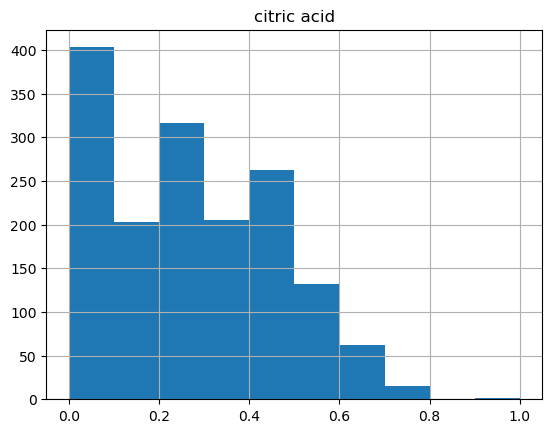

In [24]:
#Histogram
df[['citric acid']].hist()

In [26]:
#Confidence interval of Density mean
print(df.density.mean())
st.norm.interval(confidence=0.95,
                 loc=df.density.mean(),
                 scale=st.sem(df.density))

0.9967466791744841


(0.9966541725972521, 0.9968391857517162)

<Axes: >

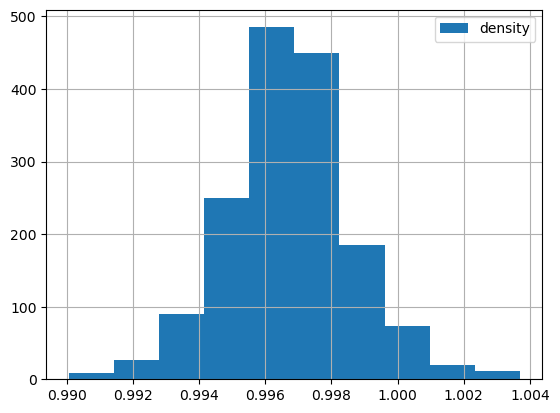

In [42]:
#Hitogram of Density mean
df.density.hist(legend=True)

# T-test

In [29]:
#load data
data = pd.read_csv('stackoverflow.csv')
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
#subset
salary_uk = data.loc[data.Country == 'United Kingdom'].Salary
salary_de = data.loc[data.Country == 'Germany'].Salary


In [36]:
#T-test
stat, p = st.ttest_ind(a=salary_uk, b=salary_de)
print(p)
if p > 0.05:
    print('Both countries have similar salaries (fail to reject H0)')
else:
    print('There is a difference in salaries (reject H0)')

0.026389999555203505
There is a difference in salaries (reject H0)


In [38]:
#T-test in experience between India and United States
experience_in = data.loc[data.Country == 'India'].YearsCodedJob
experience_us = data.loc[data.Country == 'United States'].YearsCodedJob

stat, p = st.ttest_ind(a=experience_in, b=experience_us)
print(p)
if p > 0.05:
    print('Both countries have similar experience (fail to reject H0)')
else:
    print('There is a difference in experience (reject H0)')

5.225676347614714e-58
There is a difference in experience (reject H0)


<Axes: >

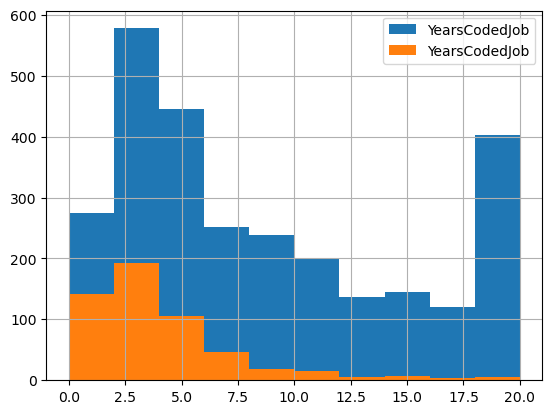

In [41]:
#Histograms
experience_us.hist(legend=True)
experience_in.hist(legend=True)

# Chi-square test

In [46]:
#cross tabulation
tab = pd.crosstab(index=data.Country,
                  columns=data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [49]:
#chi-square test
chi2, p, dof, ex = st.chi2_contingency(tab)
print(p)
if p > 0.05:
    print("There is no relationship (fail to reject H0")
else:
    print("There is a strong relationship (reject H0)")

3.321120877301216e-16
There is a strong relationship (reject H0)


In [53]:
#Chi square test between company size and hobbies
tab2 = pd.crosstab(index=data.CompanySizeNumber,
                  columns=data.Hobby)
tab2



Hobby,0,1
CompanySizeNumber,,
1,101,311
10,123,400
20,293,961
100,245,918
500,91,309
1000,180,436
5000,60,192
10000,243,731


In [54]:
chi2, p, dof, ex = st.chi2_contingency(tab2)
print(p)
if p > 0.05:
    print("There is no relationship (fail to reject H0")
else:
    print("There is a strong relationship (reject H0)")

0.025708455559671047
There is a strong relationship (reject H0)
